In [54]:
from samalg import SAM
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context
import seaborn as sns

In [29]:
path = '/Users/ta13/vscode_files/miravidia_v10/neuron1'

In [36]:
mira_neuron1=SAM()

In [37]:
mira_neuron1.load_data('miracidia.v10.Neuron1.counts.csv')

In [38]:
mira_neuron1.preprocess_data()

In [39]:
mira_neuron1.run(seed=20)

RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7008887353151771
Iteration: 2, Convergence: 0.05704971574364699
Iteration: 3, Convergence: 0.012760995961419405
Computing the UMAP embedding...
Elapsed time: 7.081147909164429 seconds


<AxesSubplot:>

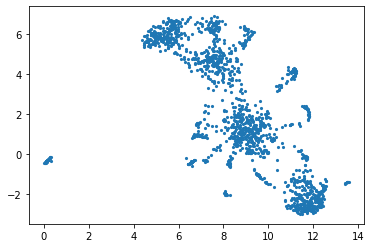

In [40]:
mira_neuron1.scatter()

In [41]:
mira_neuron1.dispersion_ranking_NN(save_avgs=True)

array([0.        , 0.27715274, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [46]:
mira_neuron1.clustering(method = 'leiden', param = 1.5)

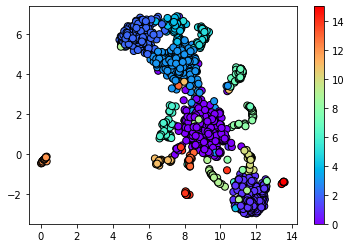

In [47]:
mira_neuron1.scatter(c = 'leiden_clusters', linewidth = 1, s = 50, edgecolor='black'
            , colorbar=True)
plt.savefig('mira_neuron1.seed20.leiden_clusters.pdf', dpi=500)

In [48]:
print(mira_neuron1.adata.uns['ranked_genes'][:20])

['Smp-133260' 'Smp-091640' 'Smp-134550' 'Smp-031310' 'Smp-088360'
 'Smp-041650' 'Smp-200440' 'Smp-066990' 'Smp-146190' 'Smp-142160'
 'Smp-150650' 'Smp-340860' 'Smp-035800' 'Smp-129230' 'Smp-035790'
 'Smp-322590' 'Smp-106010' 'Smp-098960' 'Smp-137750' 'Smp-204260']


In [49]:
mira_neuron1_adata = mira_neuron1.adata

In [50]:
mira_neuron1_adata

AnnData object with n_obs × n_vars = 1470 × 9049
    obs: 'leiden_clusters'
    var: 'mask_genes', 'means', 'variances', 'weights', 'spatial_dispersions'
    uns: 'path_to_file', 'preprocess_args', 'run_args', 'ranked_genes'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'X_disp', 'X_knn_avg'
    obsp: 'distances', 'connectivities', 'nnm'

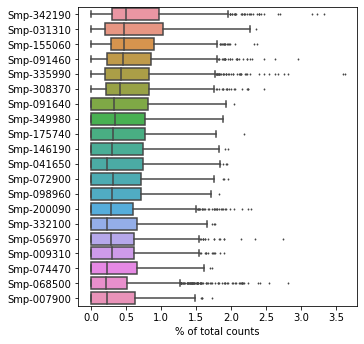

In [51]:
sc.pl.highest_expr_genes(mira_neuron1_adata, n_top=20, )

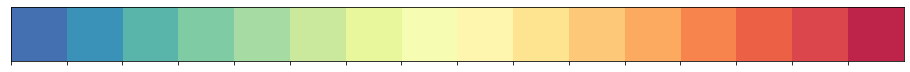

In [61]:
custom_palette = sns.color_palette("Spectral_r", 16)
sns.palplot(custom_palette)

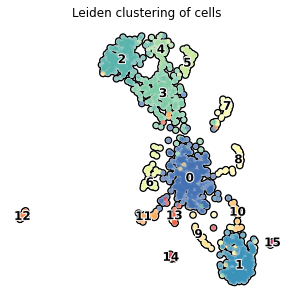

In [62]:


with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(mira_neuron1_adata, color='leiden_clusters', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='Leiden clustering of cells', palette=custom_palette,save='mirav10_neuron1_adata.seed20.leiden_clusters.pdf')

In [63]:
sc.tl.rank_genes_groups(mira_neuron1_adata, groupby='leiden_clusters', method='wilcoxon')

In [64]:
pd.DataFrame(mira_neuron1_adata.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Smp-176080,Smp-091460,Smp-091640,Smp-031310,Smp-179460,Smp-137750,Smp-200440,Smp-150640,Smp-134550,Smp-347710,Smp-201700,Smp-133260,Smp-106010,Smp-159950,Smp-340860,Smp-331560
1,Smp-056360,Smp-308370,Smp-041650,Smp-041650,Smp-031310,Smp-342090,Smp-068500,Smp-135080,Smp-088360,Smp-304980,Smp-129230,Smp-129230,Smp-142160,Smp-323790,Smp-204260,Smp-331460
2,Smp-267000,Smp-056970,Smp-175740,Smp-146190,Smp-342190,Smp-340490,Smp-073270,Smp-245900,Smp-070100,Smp-140000,Smp-150650,Smp-154850,Smp-322590,Smp-204260,Smp-129240,Smp-194830
3,Smp-337260,Smp-155060,Smp-146190,Smp-098960,Smp-146190,Smp-143270,Smp-188580,Smp-300580,Smp-122500,Smp-331390,Smp-147260,Smp-332540,Smp-004710,Smp-333010,Smp-210510,Smp-331420
4,Smp-091460,Smp-038560,Smp-098960,Smp-349980,Smp-322950,Smp-176310,Smp-201600,Smp-180350,Smp-068500,Smp-045990,Smp-093210,Smp-201700,Smp-073270,Smp-068500,Smp-004310,Smp-336780


In [65]:
myTop5genes = pd.DataFrame(mira_neuron1_adata.uns['rank_genes_groups']['names']).head(5)

In [66]:
myTop5genes

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Smp-176080,Smp-091460,Smp-091640,Smp-031310,Smp-179460,Smp-137750,Smp-200440,Smp-150640,Smp-134550,Smp-347710,Smp-201700,Smp-133260,Smp-106010,Smp-159950,Smp-340860,Smp-331560
1,Smp-056360,Smp-308370,Smp-041650,Smp-041650,Smp-031310,Smp-342090,Smp-068500,Smp-135080,Smp-088360,Smp-304980,Smp-129230,Smp-129230,Smp-142160,Smp-323790,Smp-204260,Smp-331460
2,Smp-267000,Smp-056970,Smp-175740,Smp-146190,Smp-342190,Smp-340490,Smp-073270,Smp-245900,Smp-070100,Smp-140000,Smp-150650,Smp-154850,Smp-322590,Smp-204260,Smp-129240,Smp-194830
3,Smp-337260,Smp-155060,Smp-146190,Smp-098960,Smp-146190,Smp-143270,Smp-188580,Smp-300580,Smp-122500,Smp-331390,Smp-147260,Smp-332540,Smp-004710,Smp-333010,Smp-210510,Smp-331420
4,Smp-091460,Smp-038560,Smp-098960,Smp-349980,Smp-322950,Smp-176310,Smp-201600,Smp-180350,Smp-068500,Smp-045990,Smp-093210,Smp-201700,Smp-073270,Smp-068500,Smp-004310,Smp-336780


In [67]:
myTop5genes.to_dict('list')

{'0': ['Smp-176080', 'Smp-056360', 'Smp-267000', 'Smp-337260', 'Smp-091460'],
 '1': ['Smp-091460', 'Smp-308370', 'Smp-056970', 'Smp-155060', 'Smp-038560'],
 '2': ['Smp-091640', 'Smp-041650', 'Smp-175740', 'Smp-146190', 'Smp-098960'],
 '3': ['Smp-031310', 'Smp-041650', 'Smp-146190', 'Smp-098960', 'Smp-349980'],
 '4': ['Smp-179460', 'Smp-031310', 'Smp-342190', 'Smp-146190', 'Smp-322950'],
 '5': ['Smp-137750', 'Smp-342090', 'Smp-340490', 'Smp-143270', 'Smp-176310'],
 '6': ['Smp-200440', 'Smp-068500', 'Smp-073270', 'Smp-188580', 'Smp-201600'],
 '7': ['Smp-150640', 'Smp-135080', 'Smp-245900', 'Smp-300580', 'Smp-180350'],
 '8': ['Smp-134550', 'Smp-088360', 'Smp-070100', 'Smp-122500', 'Smp-068500'],
 '9': ['Smp-347710', 'Smp-304980', 'Smp-140000', 'Smp-331390', 'Smp-045990'],
 '10': ['Smp-201700', 'Smp-129230', 'Smp-150650', 'Smp-147260', 'Smp-093210'],
 '11': ['Smp-133260', 'Smp-129230', 'Smp-154850', 'Smp-332540', 'Smp-201700'],
 '12': ['Smp-106010', 'Smp-142160', 'Smp-322590', 'Smp-004710'

In [68]:
myTop5genes = myTop5genes.to_dict('list')

In [69]:
myTop5genes

{'0': ['Smp-176080', 'Smp-056360', 'Smp-267000', 'Smp-337260', 'Smp-091460'],
 '1': ['Smp-091460', 'Smp-308370', 'Smp-056970', 'Smp-155060', 'Smp-038560'],
 '2': ['Smp-091640', 'Smp-041650', 'Smp-175740', 'Smp-146190', 'Smp-098960'],
 '3': ['Smp-031310', 'Smp-041650', 'Smp-146190', 'Smp-098960', 'Smp-349980'],
 '4': ['Smp-179460', 'Smp-031310', 'Smp-342190', 'Smp-146190', 'Smp-322950'],
 '5': ['Smp-137750', 'Smp-342090', 'Smp-340490', 'Smp-143270', 'Smp-176310'],
 '6': ['Smp-200440', 'Smp-068500', 'Smp-073270', 'Smp-188580', 'Smp-201600'],
 '7': ['Smp-150640', 'Smp-135080', 'Smp-245900', 'Smp-300580', 'Smp-180350'],
 '8': ['Smp-134550', 'Smp-088360', 'Smp-070100', 'Smp-122500', 'Smp-068500'],
 '9': ['Smp-347710', 'Smp-304980', 'Smp-140000', 'Smp-331390', 'Smp-045990'],
 '10': ['Smp-201700', 'Smp-129230', 'Smp-150650', 'Smp-147260', 'Smp-093210'],
 '11': ['Smp-133260', 'Smp-129230', 'Smp-154850', 'Smp-332540', 'Smp-201700'],
 '12': ['Smp-106010', 'Smp-142160', 'Smp-322590', 'Smp-004710'

In [70]:
fd = pd.DataFrame(mira_neuron1_adata.uns['rank_genes_groups']['names'])

In [71]:
fd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Smp-176080,Smp-091460,Smp-091640,Smp-031310,Smp-179460,Smp-137750,Smp-200440,Smp-150640,Smp-134550,Smp-347710,Smp-201700,Smp-133260,Smp-106010,Smp-159950,Smp-340860,Smp-331560
1,Smp-056360,Smp-308370,Smp-041650,Smp-041650,Smp-031310,Smp-342090,Smp-068500,Smp-135080,Smp-088360,Smp-304980,Smp-129230,Smp-129230,Smp-142160,Smp-323790,Smp-204260,Smp-331460
2,Smp-267000,Smp-056970,Smp-175740,Smp-146190,Smp-342190,Smp-340490,Smp-073270,Smp-245900,Smp-070100,Smp-140000,Smp-150650,Smp-154850,Smp-322590,Smp-204260,Smp-129240,Smp-194830
3,Smp-337260,Smp-155060,Smp-146190,Smp-098960,Smp-146190,Smp-143270,Smp-188580,Smp-300580,Smp-122500,Smp-331390,Smp-147260,Smp-332540,Smp-004710,Smp-333010,Smp-210510,Smp-331420
4,Smp-091460,Smp-038560,Smp-098960,Smp-349980,Smp-322950,Smp-176310,Smp-201600,Smp-180350,Smp-068500,Smp-045990,Smp-093210,Smp-201700,Smp-073270,Smp-068500,Smp-004310,Smp-336780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,Smp-337090,Smp-035800,Smp-342190,Smp-056970,Smp-322560,Smp-145300,Smp-337090,Smp-340900,Smp-009310,Smp-175740,Smp-322220,Smp-175740,Smp-031310,Smp-085300,Smp-054240,Smp-054240
9045,Smp-091640,Smp-091640,Smp-335990,Smp-073790,Smp-015690,Smp-155060,Smp-348230,Smp-155060,Smp-122840,Smp-068500,Smp-041650,Smp-063300,Smp-146190,Smp-044580,Smp-041650,Smp-022640
9046,Smp-146190,Smp-146190,Smp-026560,Smp-155060,Smp-010940,Smp-090230,Smp-035790,Smp-013470,Smp-042090,Smp-089430,Smp-098960,Smp-035790,Smp-035800,Smp-332100,Smp-146190,Smp-018990
9047,Smp-041650,Smp-098960,Smp-068500,Smp-091460,Smp-203635,Smp-035200,Smp-041650,Smp-050220,Smp-030690,Smp-031310,Smp-146190,Smp-041650,Smp-122840,Smp-200090,Smp-175740,Smp-072900


In [72]:
fd.to_csv('mirav10neuron1_adataclusts_scanpySAMgenes.csv', index=False, header=True)

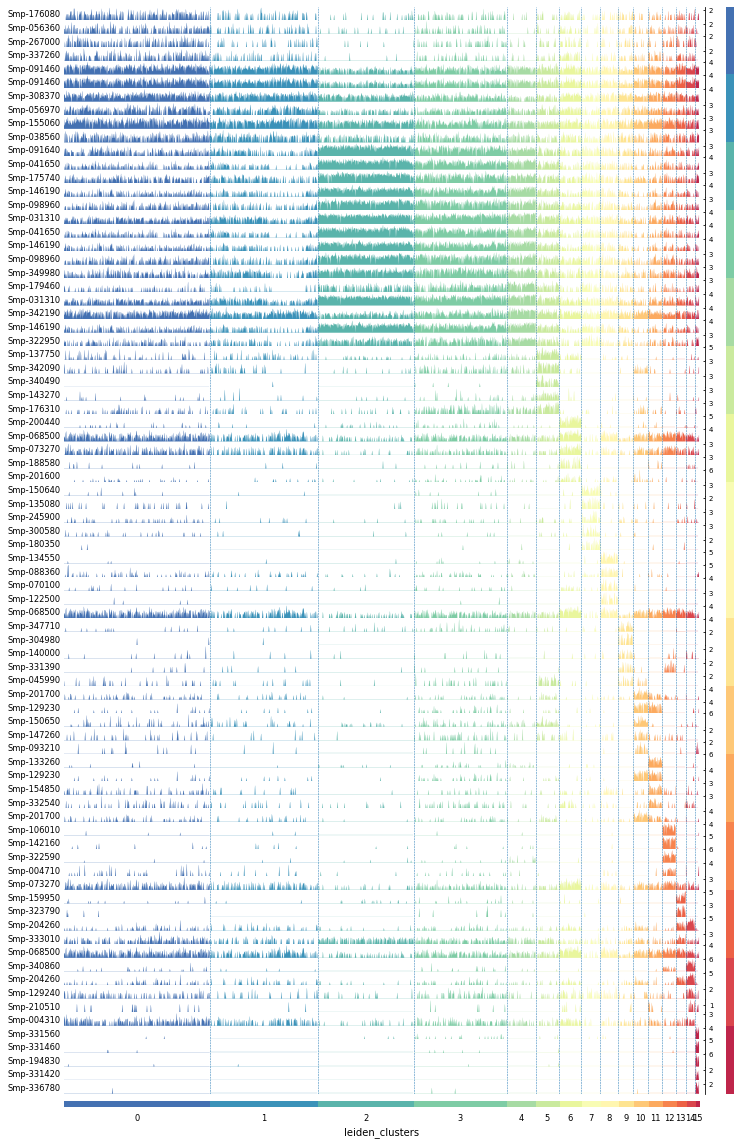

In [73]:
sc.pl.tracksplot(mira_neuron1_adata, myTop5genes,'leiden_clusters', dendrogram=False, save='mirav10_neuron1_adata.seed20.leiden_clusters.pdf')

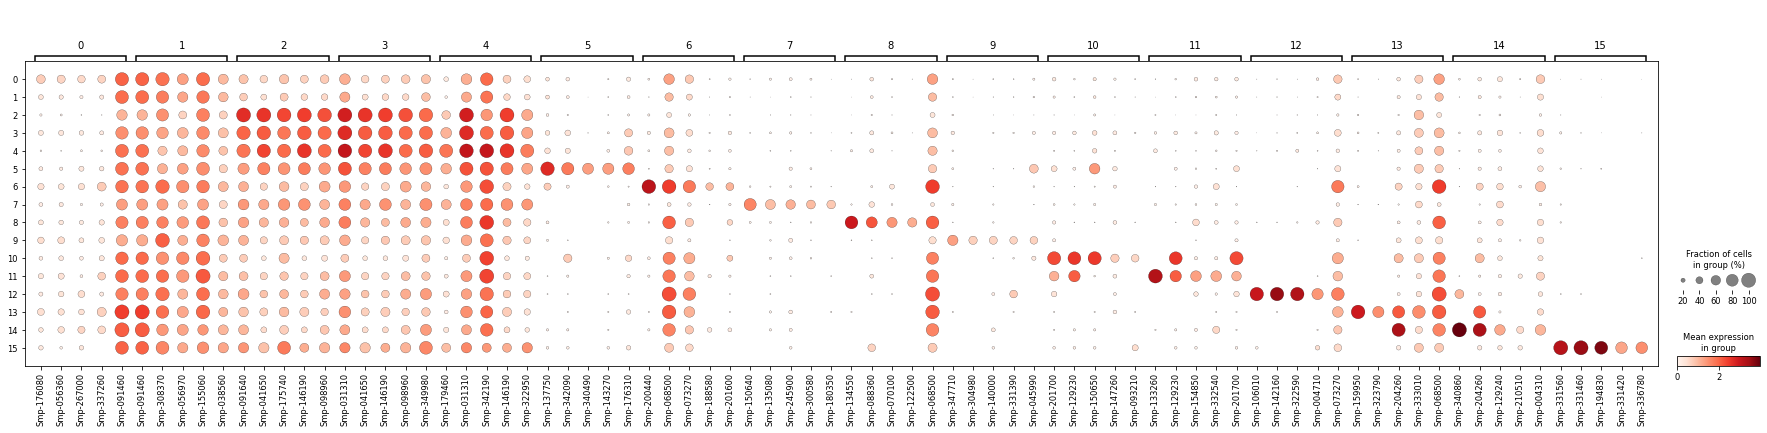

In [74]:
sc.pl.dotplot(mira_neuron1_adata, myTop5genes,'leiden_clusters', dendrogram=False, save='mirav10_neuron1_adata.seed20.leiden_clusters_red.pdf')


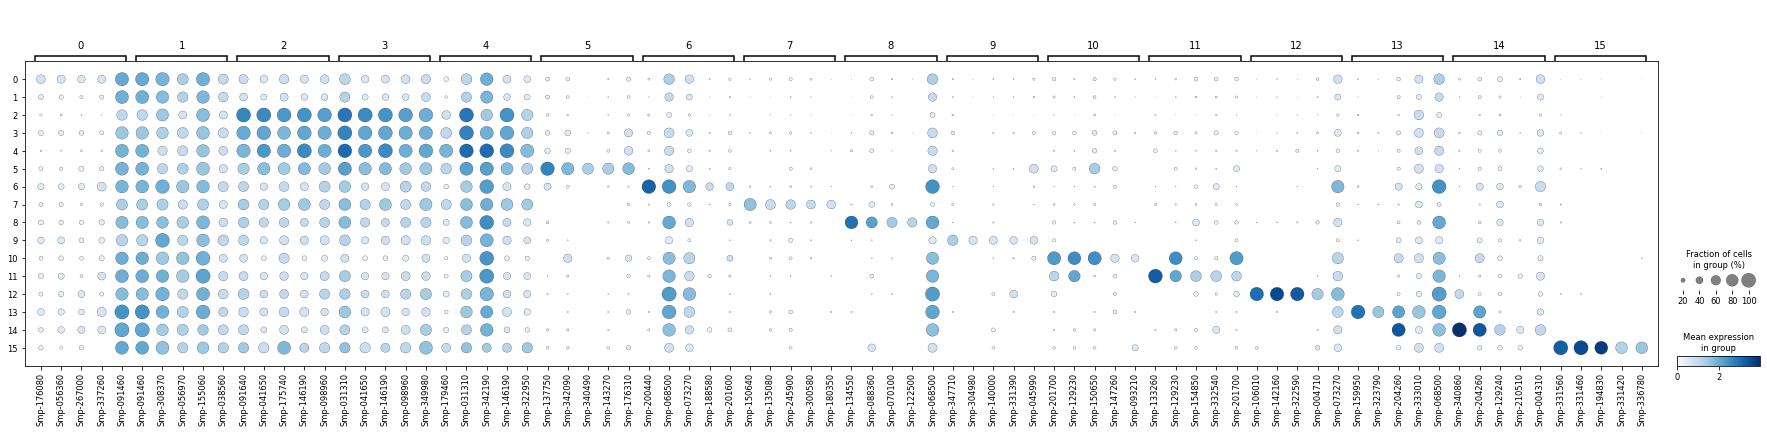

In [75]:
sc.pl.dotplot(mira_neuron1_adata, myTop5genes,'leiden_clusters', cmap='Blues',dendrogram=False, save='mirav10_neuron1_adata.seed20.leiden_clusters.pdf')

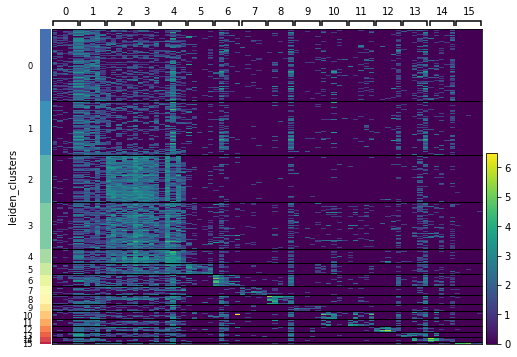

In [77]:
sc.pl.heatmap(mira_neuron1_adata, myTop5genes, groupby='leiden_clusters', cmap='viridis', dendrogram=False, save='mirav10_neuron1_adata.seed20.leiden_clusters.pdf')

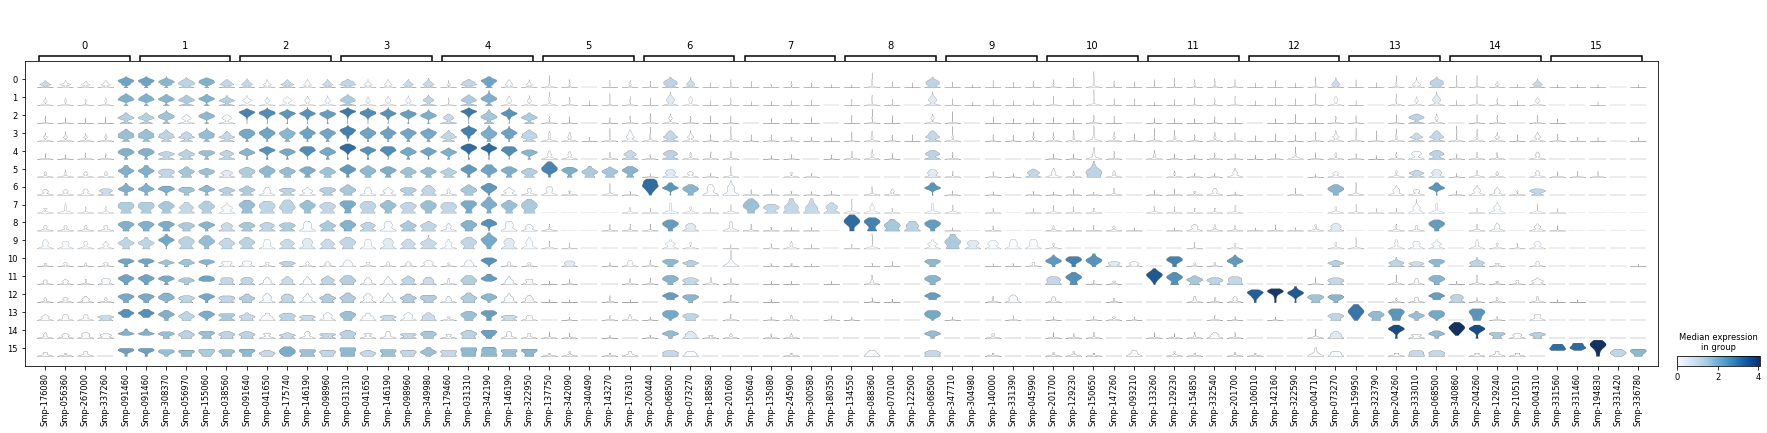

In [40]:
sc.pl.stacked_violin(mira_neuron1_adata, myTop5genes, groupby='leiden_clusters', swap_axes=False, dendrogram=False, save='mirav10_neuron1_adata.seed20.leiden_clusters.pdf')

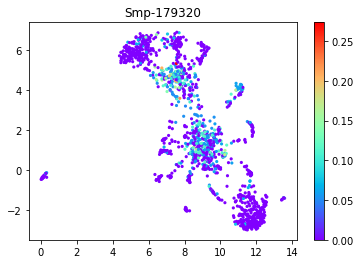

In [41]:
mira_neuron1.show_gene_expression('Smp-179320');
plt.savefig('mirav10_neuron1_adata.seed20.Smp-179320.pdf', dpi=500)

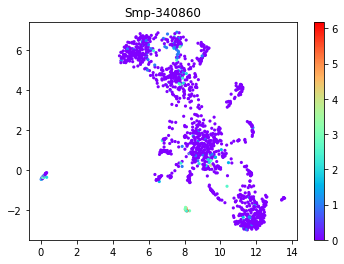

In [78]:
mira_neuron1.show_gene_expression('Smp-340860',  avg=False);
plt.savefig('mirav10_neuron1_adata.seed20.Smp-340860.pdf', dpi=500)


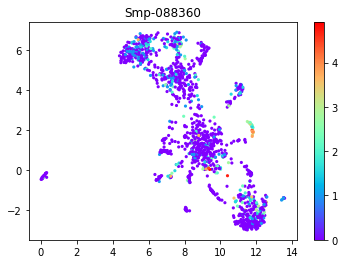

In [79]:
mira_neuron1.show_gene_expression('Smp-088360',  avg=False);
plt.savefig('mirav10_neuron1_adata.seed20.Smp-088360.pdf', dpi=500)

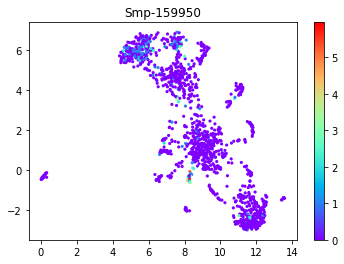

In [80]:

mira_neuron1.show_gene_expression('Smp-159950',  avg=False);
plt.savefig('mirav10_neuron1_adata.seed20.Smp-159950.pdf', dpi=500)

IndexError: index 0 is out of bounds for axis 0 with size 0

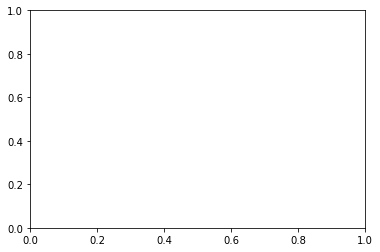

In [62]:
mira_neuron1.show_gene_expression('Smp-050220',  avg=False);
plt.savefig('mirav10_neuron1_adata.seed20.Smp-050220.pdf', dpi=500)

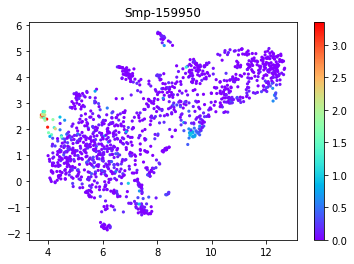

In [63]:
mira_neuron1.show_gene_expression('Smp-159950');
plt.savefig('mira_neuron1_adata.seed20.Smp-159950.pdf', dpi=500)

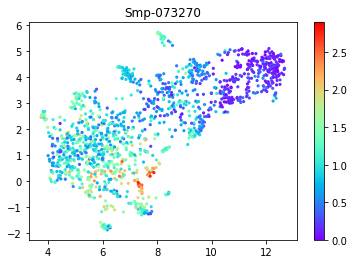

In [64]:
mira_neuron1.show_gene_expression('Smp-073270');
plt.savefig('mira_neuron1_adata.seed20.Smp-073270.pdf', dpi=500)

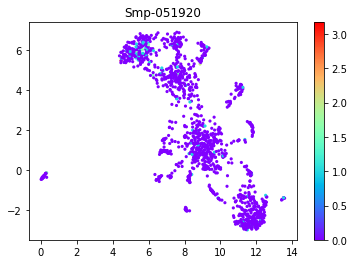

In [78]:
mira_neuron1.show_gene_expression('Smp-051920',  avg=False);